In [51]:
import pandas as pd

In [52]:
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")


In [53]:
#juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])
df

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [55]:
#alterando tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [56]:
#consultando valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [6]:
#substituindo valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)

In [7]:
#removendo valores nulos
df.dropna(inplace = True)

In [8]:
#removendo valores nulos em apenas uma coluna
df.dropna(subset=["Vendas"], inplace = True)

In [57]:
#criando novas colunas
df["Receita"] = df["Vendas"]  * df["Qtde"]
df["Receita/Venda"] = df["Receita"] / df["Vendas"]
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0


Trabalhando com datas

In [58]:
df["Data"] = df["Data"].astype("int64")
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


Cidade            object
Data               int64
Vendas           float64
LojaID            object
Qtde               int64
Receita          float64
Receita/Venda    float64
dtype: object

In [59]:
#transformando a coluna Data para o tipo data novamente
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                   object
Data             datetime64[ns]
Vendas                  float64
LojaID                   object
Qtde                      int64
Receita                 float64
Receita/Venda           float64
dtype: object

In [60]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [61]:
df["Ano_Venda"] = df["Data"].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018


In [62]:
#extraindo mês e dia
df["Mês"], df["Dia"] = (df["Data"].dt.month, df["Data"].dt.day)
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mês,Dia
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3
239,Salvador,2019-01-03,161.41,1037,3,484.23,3.0,2019,1,3


In [15]:
#data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [63]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19.sample(5)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mês,Dia
32,Natal,2019-03-17,244.00,854,2,488.00,2.0,2019,3,17
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019,3,2
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2
118,Recife,2019-03-02,17.70,981,5,88.50,5.0,2019,3,2
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2


# Visualização de dados

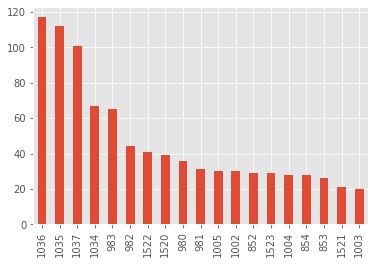

In [64]:
#gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

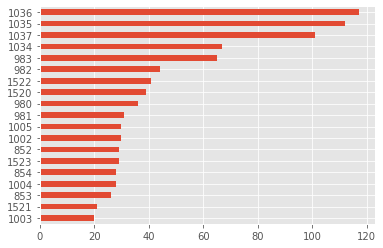

In [65]:
df["LojaID"].value_counts(ascending=True).plot.barh()

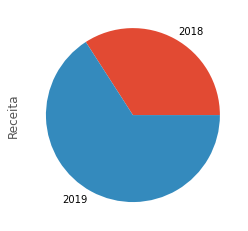

In [66]:
#gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [67]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

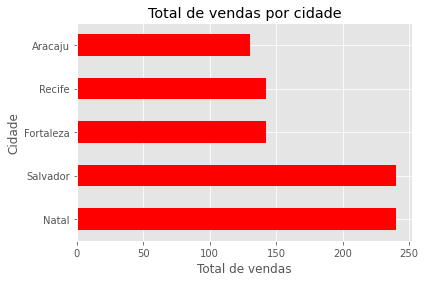

In [68]:
#adicionando titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.barh(title="Total de vendas por cidade", color="red")
plt.ylabel("Cidade")
plt.xlabel("Total de vendas");

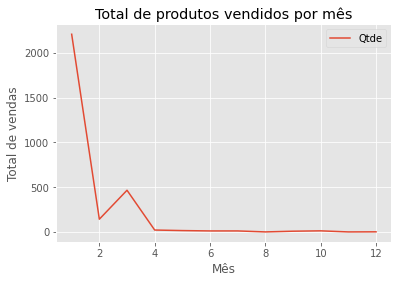

In [69]:
#alterando o estilo
plt.style.use("ggplot")

df.groupby(df["Mês"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de vendas")
plt.legend()

In [80]:
#selecionando apenas as vendas de 2019
df = df.rename(columns = {"Ano_Venda":"Ano"})
df_2019 = df[df["Ano"] == 2019]
df_2019.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano,Mês,Dia
169,Natal,2019-01-02,166.73,1037,2,333.46,2.0,2019,1,2
152,Natal,2019-01-02,20.07,1035,1,20.07,1.0,2019,1,2
184,Salvador,2019-01-02,167.16,1037,1,167.16,1.0,2019,1,2
39,Recife,2019-01-01,143.58,981,3,430.74,3.0,2019,1,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2


Text(0.5, 0, 'Mês')

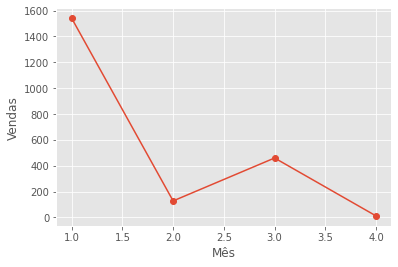

In [90]:
#total de vendas por mês
df_2019.groupby(df_2019["Mês"])["Qtde"].sum().plot(marker="o")
plt.ylabel("Vendas")
plt.xlabel("Mês")
# df_2019

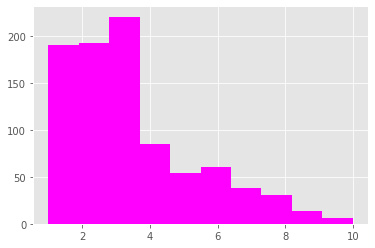

In [92]:
#histograma
plt.hist(df["Qtde"], color="Magenta");

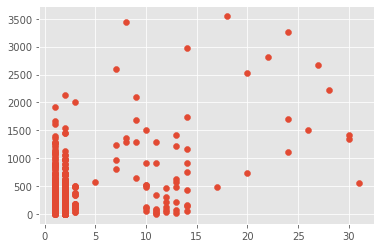

In [93]:
plt.scatter(x = df_2019["Dia"], y = df_2019["Receita"])

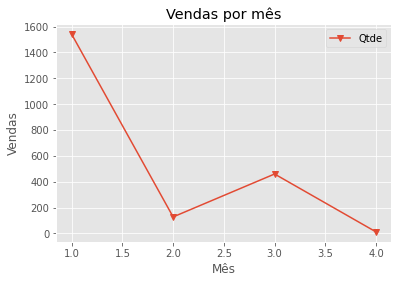

In [100]:
#salvando um gráfico
df_2019.groupby(df_2019["Mês"])["Qtde"].sum().plot(marker = "v")
plt.title("Vendas por mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.legend()
plt.savefig("Quantidade de vendas por mês.png")